# EDA

## Data불러오기

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
#from dataprep.eda import plot, plot_correlation, plot_missing, create_report

In [2]:
import matplotlib as mpl
from scipy import stats

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 한글 깨짐
plt.rcParams['font.family'] = 'Malgun Gothic'

In [11]:
features = ['broadcast', 'exp_min', 'm_code', 'p_code', 'p_name', 'p_group', 'unit_price', 'total_price']
dtype_list = ['datetime64', 'float64', 'int32', 'int32', 'object', 'object', 'int32', 'float64']
dtypes =  dict(zip(features, dtype_list))

df = pd.read_excel('base_line.xlsx', dtype=dtypes)
df.shape

(37372, 18)

In [9]:
# 판매 개수 변수 추가
#df['sales'] = round(df['total_price']/df['unit_price'],0)

In [14]:
df2=df

## 취급액 살표보기(평균)

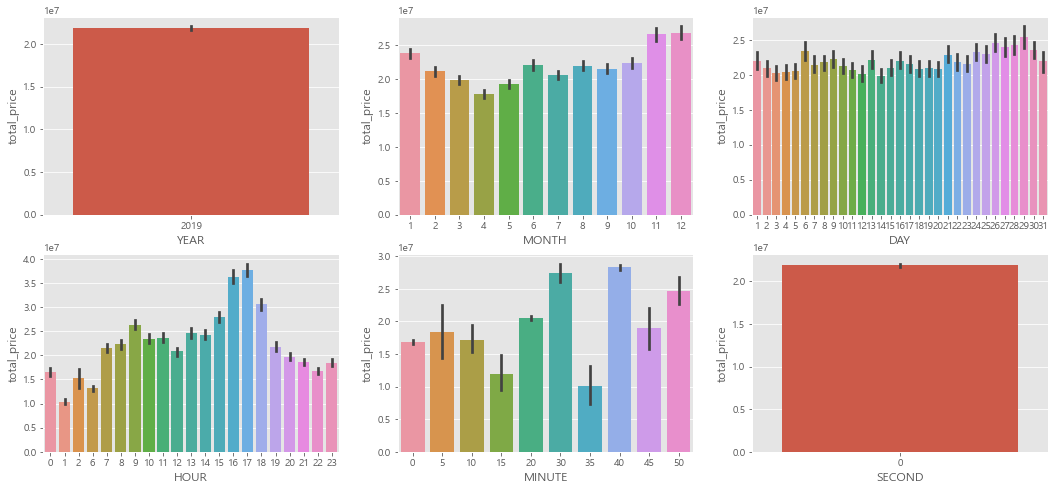

In [15]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=df2, x="YEAR", y="total_price", ax=ax1)
sns.barplot(data=df2, x="MONTH", y="total_price", ax=ax2)
sns.barplot(data=df2, x="DAY", y="total_price", ax=ax3)
sns.barplot(data=df2, x="HOUR", y="total_price", ax=ax4)
sns.barplot(data=df2, x="MINUTE", y="total_price", ax=ax5)
sns.barplot(data=df2, x="SECOND", y="total_price", ax=ax6)

In [17]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]

In [16]:
data=df2

# 카테고리 살펴보기

In [17]:
# 월별 데이터 자르기

In [19]:
month_name = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']

In [20]:
data_list = []
for idx, mon in enumerate(month_name) : 
    globals()['{}_data'.format(mon)] = data[data['MONTH'] == idx+1]

[Text(0.5, 1.0, '12월 편성')]

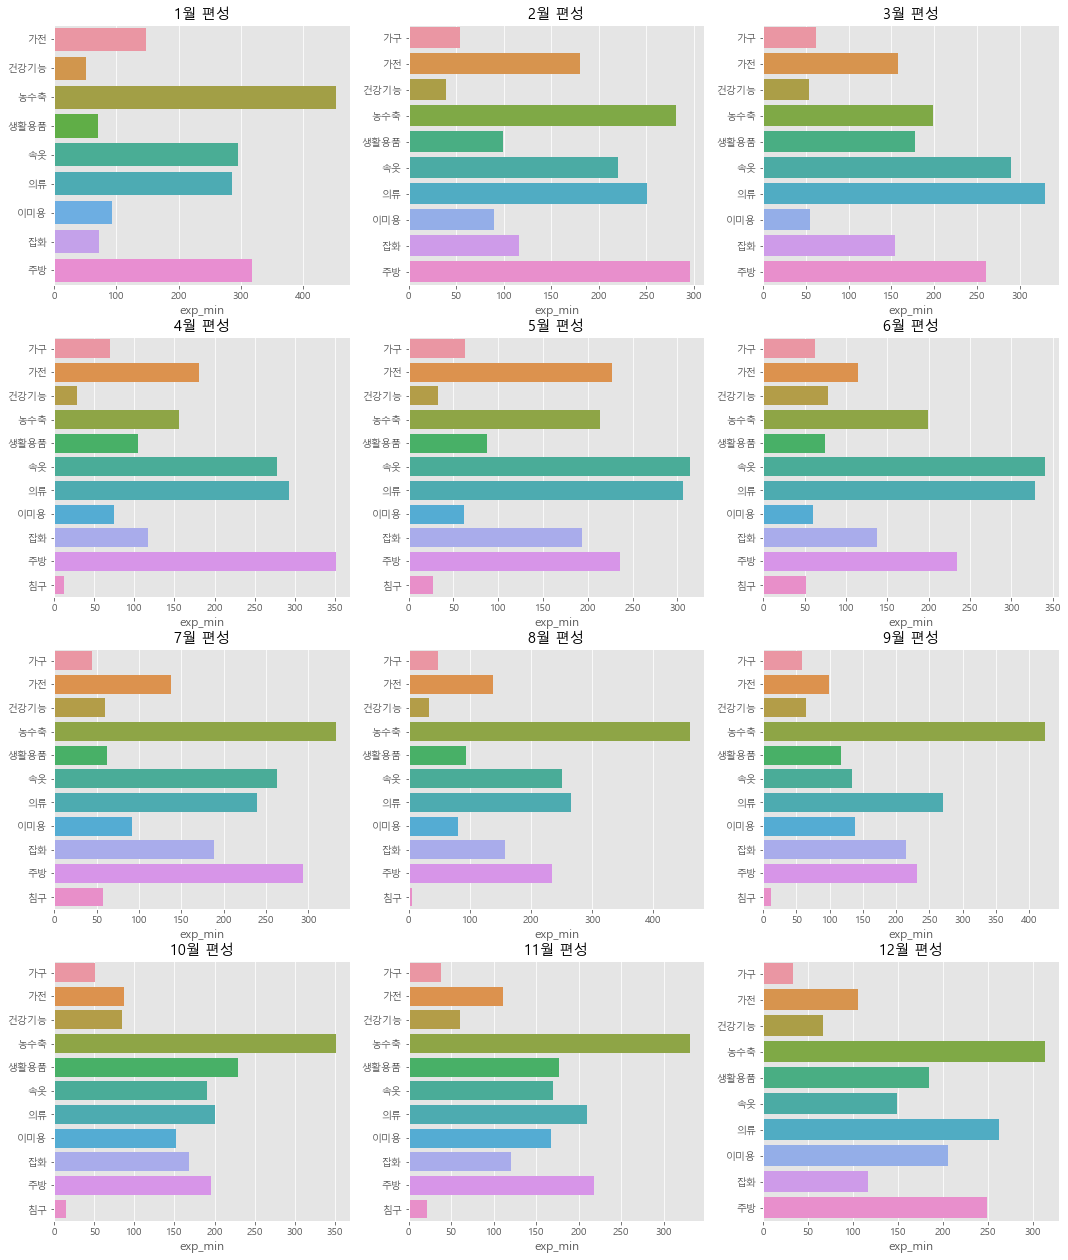

In [21]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9), (ax10,ax11,ax12)) = plt.subplots(nrows=4, ncols=3)
figure.set_size_inches(18,22)

sns.barplot(data = january_data, x=january_data.groupby('p_group').count()['exp_min'], y=np.unique(january_data['p_group']), ax=ax1)
sns.barplot(data = february_data, x=february_data.groupby('p_group').count()['exp_min'], y=np.unique(february_data['p_group']), ax=ax2)
sns.barplot(data = march_data, x=march_data.groupby('p_group').count()['exp_min'], y=np.unique(march_data['p_group']), ax=ax3)

sns.barplot(data = april_data, x=april_data.groupby('p_group').count()['exp_min'], y=np.unique(april_data['p_group']), ax=ax4)
sns.barplot(data = may_data, x=may_data.groupby('p_group').count()['exp_min'], y=np.unique(may_data['p_group']), ax=ax5)
sns.barplot(data = june_data, x=june_data.groupby('p_group').count()['exp_min'], y=np.unique(june_data['p_group']), ax=ax6)

sns.barplot(data = july_data, x=july_data.groupby('p_group').count()['exp_min'], y=np.unique(july_data['p_group']), ax=ax7)
sns.barplot(data = august_data, x=august_data.groupby('p_group').count()['exp_min'], y=np.unique(august_data['p_group']), ax=ax8)
sns.barplot(data = september_data, x=september_data.groupby('p_group').count()['exp_min'], y=np.unique(september_data['p_group']), ax=ax9)

sns.barplot(data = october_data, x=october_data.groupby('p_group').count()['exp_min'], y=np.unique(october_data['p_group']), ax=ax10)
sns.barplot(data = november_data, x=november_data.groupby('p_group').count()['exp_min'], y=np.unique(november_data['p_group']), ax=ax11)
sns.barplot(data = december_data, x=december_data.groupby('p_group').count()['exp_min'], y=np.unique(december_data['p_group']), ax=ax12)

ax1.set(title="1월 편성")
ax2.set(title="2월 편성")
ax3.set(title="3월 편성")
ax4.set(title="4월 편성")
ax5.set(title="5월 편성")
ax6.set(title="6월 편성")
ax7.set(title="7월 편성")
ax8.set(title="8월 편성")
ax9.set(title="9월 편성")
ax10.set(title="10월 편성")
ax11.set(title="11월 편성")
ax12.set(title="12월 편성")

In [ ]:
#주중 : 오전/오후 08시∼11시(다만, NS쇼핑은 09∼12시, 15∼18시), 주말 : 08시∼23